# 2026-01-09 First Day
## CSCI-5636: Numerical solution of partial differential equations (PDE)

## Instructor: Jed Brown, jed.brown@colorado.edu, ECOT 824
## Meeting: Mon, Wed, Fri at 2:30-3:20 in ECCR 110

1. Who am I?
2. What is this course about?
3. How will it work?
4. Discussion

# Positionality: Who am I?

* Jed Brown (he/they); you can call me Jed
* Math + Physics undergrad, MS Math, Dr.Sc. Environmental Engineering (Computational Glaciology)
* Postdoc and staff at Argonne National Laboratory (DOE Office of Science)
* CU since 2015
* Maintainer of open source software like [PETSc](https://petsc.org) and [libCEED](https://libceed.org)
* Cis-het white man (which unavoidably affects my experience in these spaces)

# What are PDE?

## partial derivatives

* Gradient $\mathbf g(\mathbf x) = \nabla u(\mathbf x)$
  * scalar field to vector field
* Curl $\mathbf c(\mathbf x) = \nabla\times \mathbf g(\mathbf x)$
 * vector field to vector field
* Divergence $d(\mathbf x) = \nabla\cdot \mathbf c(\mathbf x)$
  * vector field to scalar field
* time derivatives: $\frac{\partial u(t, \mathbf x)}{\partial t}$

## what do they describe?

* heat transfer
* electrostatics, electromagnetics
* solid mechanics
* fluid mechanics
* quantum mechanics
* population dynamics

Find $u$ such that
\begin{align}
-\nabla\cdot\big(\kappa(\mathbf x) \nabla u(\mathbf x)\big) &= f(\mathbf x) & \mathbf x &\in \Omega \\
u(\mathbf x) &= g(\mathbf x) & \mathbf x &\in \Gamma_D \subset \partial\Omega \\
\kappa(\mathbf x) \nabla u(\mathbf x) \cdot \mathbf{\hat n}(\mathbf x) &= h(\mathbf x) & \mathbf x &\in \Gamma_N \subset\partial\Omega
\end{align}

# Structural mechanics

<video src="img/schwarz-pendulum.webm" autoplay loop />

<video src="img/schwarz-q2-5x5x5-t20-l2-r2.webm" autoplay loop />

# What does it mean to discretize a PDE?

Find $u$ such that
\begin{align}
-\nabla\cdot\big(\kappa(\mathbf x) \nabla u(\mathbf x)\big) &= f(\mathbf x) & \mathbf x &\in \Omega \\
u(\mathbf x) &= g(\mathbf x) & \mathbf x &\in \Gamma_D \subset \partial\Omega \\
\nabla u(\mathbf x) \cdot \mathbf{\hat n}(\mathbf x) &= h(\mathbf x) & \mathbf x &\in \Gamma_N \subset\partial\Omega
\end{align}

## How is it satisfied?
* At grid points with rules to approximate derivatives
  * Finite Difference / collocation
* A weak (integral) over elements with rules to reconstruct from element averages and define fluxes
  * Finite Volume
* A weak form over elements with solution and "test functions" in the same space
  * Finite Element / Galerkin

## How expensive is it?

* Suppose our domain is $\Omega = (0, 1)^3$

In [1]:
using Plots

# a common "good" discretiation
error(h) = min(1, 10*h^4)

function cost(h)
    n = 1/h # number of points per dimension
    N = n^3 # total number of grid points in 3D
    N
end

function cost2(h)
    N = cost(h)
    N^2
end

cost2 (generic function with 1 method)

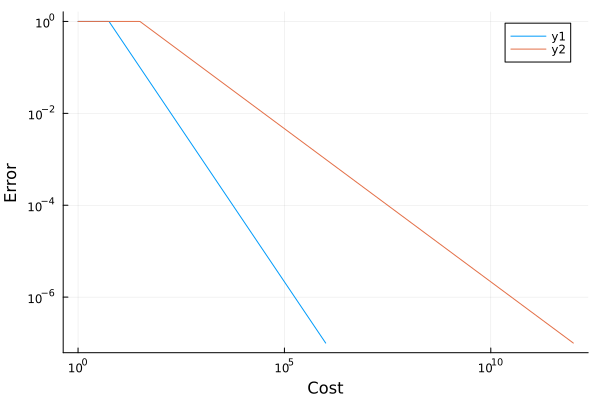

In [2]:
plot([cost, cost2], error, .01, 1, xscale=:log10, yscale=:log10,
  xlabel="Cost", ylabel="Error")

# What goes in? What comes out?

* Equations
  * Conservation
  * Variational principles
  * Materials
* Geometry
  * meshing needed?
* Boundary conditions
  * essential/Dirichlet
  * natural/Neumann
  * mixed
* Initial conditions

* Discrete solutions
  * Sampled on a grid
  * Time series
* Quantities of Interest (QoI)
  * Heat flux
  * Maximum temperature
  * Maximum stress
  * Lift, drag
* Eigensolutions
  * Resonant frequencies/modes
  * Orbitals

# Who works with PDE solvers?

* Numerical analysts
* Domain scientists and engineers
* Materials scientists
* HPC specialists
* Optimizers
* Statisticians

# What skills should they have?

Breakout groups: pick one role and make a list of essential and nice-to-have skills, plus at least one question. Pick one member to report out.

* Fluency in math/calculus/functional analysis/linear algebra
* Coding proficiency
* Interdisciplinary communication
* Domain knowledge

* ...

# Computer Science = Runnable Abstraction Science

## In the "grinder"
* Mathematical language and principles for each major class of method
  * What is covered by theory
  * When you're venturing off-trail
  * Analytic tools to predict and debug
* Realistic cost and exploitable structure
  * Performance on modern hardware
  * Algebraic solvers and time integrators
* Write/modify stand-alone code
* Select and use (parallel) libraries

## How can you trust the solution?
* Verification: solving the problem right
* Validation: solving the right problem

## Abstractions/collaboration
* Domain scientists, engineers
* Optimizers, statisticians
* Abstractions that reduce cognitive load
* Metrics/visualization for decisions

# On programming languages

## C
Reliable and popular for libraries (PETSc, etc.). "Simple", unsafe, capable of encapsulation.

## C++
Popular with applications and some libraries. Powerful, but complicated and unsafe.

## Fortran
The OG of numerical computing. Good for "array programming", but encapsulation is hard. Unsafe depending on dialect.

## Julia
For ground-up examples in class and in activities. Capable of high performance, expressive multiple dispatch, works well in a notebook. Library ecosystem for PDEs is limited, but rapidly improving.

## Python
Good access to JIT, libraries like FEniCS. Poor native performance, but good libraries to compiled code.

## Rust
New compiled language. Good performance, encapsulation, safety, static analysis. Limited libraries (so far).

You don't need to know any of these well and you can choose the language for your project.

# Intrinsic motivation

<img src="img/Butler1988-Table1.png" width="80%" />

# I won't grade and I won't waste your time

<div class="floatleft70"

  * I will provide feedback   
  * I will be a mentor and guide navigating this field
  * I will help you get what you want out of the class (with a dash of wholesome context)

  > My mom said, "basically, your professor is asking you to be an adult". That was too flexible.

  > In other classes, I didn’t feel like I could bounce back, but in this one I did.
</div>

<div class="floatright30">
<a href="https://www.wvupressonline.com/ungrading"><img src="img/Ungrading.jpg" width="100%" /></a>
</div>

# Formative vs Summative Assessment

## Formative

* Continual component of learning
* Check our understanding
* Guide next steps
* Collaborative
* Develops self-direction
* Surrounded by formative assessment throughout our careers
  * Learn to recognize these opportunities

## Summative

* Instructor evaluation of student understanding after a unit
* Driven by a need for "fairness" and "objectivity"
  * Permeates culture and goals of a class
  * Stifles creativity
* Often adversarial
* Goal is scoring/ranking, not learning itself
* Feels "cheap" when encountered in careers

This class centers formative assessment and the process by which you respond and reflect on it.

# What about the letter grade?

* Collect a portfolio of the work and insights you're most proud of
  * You can follow your creativity
* Journaling through the semester (setting goals, reflecting on formative assessments)
* Individual meetings during the last week of the semester (mid-term preview)
* We'll have a conversation and you'll propose a grade based on your portfolio
  * I'll trust you.

<img src="https://dpuk71x9wlmkf.cloudfront.net/assets/2020/02/10170035/02_V4-01.jpg" />

*I can nudge upward when students are too modest -- pretty common. In rare cases, I may adjust down.*

# What I need from you: Growth Mindset

<img src="img/Henry2019-Table1.png" width="90%" />

# What is "AI"?

## Epistemic Soundness

Professionalism is understanding how to ask questions and how to assess reliability. This involves not just "looking right", but being "right for the right reasons".

## Denial of Service Attack

My goal is not to coach you to producing an artifact, but to guide your mental model of the subject matter. That is often done through activities that produce artifacts. "AI" products are counterfeit artifacts, not a product of a consistent mental model.

## My policy: mutual trust

Please do not use "AI" in this course. I will not surveil you, and I cannot check that you aren't using it. I need to be able to ask straightforward questions without distractors.

## Embrace the load-bearing friction and human surfaces

# How will the semester look?

## Lecture periods
* Refresh, introduce, activity/group discussion, reflect
* Pointers to further resources/activities

## Readings and activities
* Annotate assigned readings
* (Short) coding, experiments, presentation of results
* Use the math and programming tools of the field
* Open-ended, go further occasionally

## Journaling and portfolio
* Set SMART goals, journal progress and revisions of those goals.
* Meet/chat approx weekly to check in with partner

## Projects (second half of semester)
* Dig into community software that implements or relies on numerical computation
* Short presentation on how the community works
 * Key stakeholders
 * Strengths and weaknesses
* Discuss and critique

## Original study or contribution
* Tutorial, documentation, performance study, comparison, new features, new application
* Reflect in a short presentation

# Expectations

1. Enter with a growth mindset, practice adaptive coping, and nurture your intrinsic motivation
2. Attend class (in-person or virtual) and participate in discussions
3. Annotate assigned readings and respond thoughtfully to prompts
4. Make an honest attempt on activities
5. Interact with the class notebooks and read reference material
6 Set goals and track your progress
  * revise these goals as you learn more
7. Meet/chat with your partner weekly for at least a few minutes
  * share how lecture and activities are going
  * share your goals and how you're progressing
  * identify questions

8. Ask or answer at least one question per week
  * ask a question that you don't know the answer to
  * ask a question that you do know the answer to, but you think will be a good exercise/seed for discussion 
  * ask me during office hours, write up your best understanding
  * make a meme relevant to the class
  * raise a concern or suggestion that you and/or peers have
  * contribute an answer or relevant discussion to any of the above
9. Individual and group projects


# Advice from previous years

"What advice would you give to your former self at the start of the term?"

> Come in with “learn as much as you can” rather than “get good grade”.

> Don’t get overwhelmed by “big dense equations”. Pay attention to initial concepts (stability, conditioning).

> Be serious about linear algebra.

> Take more initiative about how to manage time and structuring personal goals.

> Take your time and play with all the buttons, not “completionist”.

> Calm down and really write the functions, visualize, and experiment. Biggest regret was not engaging with programming activities to build concepts from class independently.

> Take things slow and don’t stress. Stay on top of topics, attend class, you’ll be okay.

# Tools

## Git and GitHub

* GitHub Classroom to manage repositories
* Write using notebooks and markdown
* Review using GitHub tools and nbgrader

## Zulip

* math- and code-aware team chat
* live, informal
* thread managemnet so a question in class can spin off into a deeper asynchronous conversation

## Jupyter

* RISE slides available on website
* Activities with scaffolding
* Nbgrader for writing feedback
* Works with many languages; we'll mostly use Julia
* Collaborative mode (new)

## JupyterHub: [coding.csel.io](https://coding.csel.io)
* Nothing to install, persistent storage
* Select `Numerical Computation` tile

# Choices in scoping the class

## Theory

Analysis first, confirm using numerics.
Limited to simpler models.

## Applied
Numerics first, pointers to useful theory.

---

## Build from scratch

Limited to simpler models, but you'll understand everything under the hood.

## Build using libraries

More installation and software layers, but can solve more interesting problems.